In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data= pd.read_csv('CO2 Emissions_Canada.csv')

In [3]:
data.head()

Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                              5.8                               5.9   
3                              9.1                              11.1   
4                              8.7                              10.6   

   Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                           33                  196  
1                           29                  221  
2                           48                  136  
3                           25                  255  
4                           27                  244

In [4]:
data.shape

(7385, 12)

#### Dataset comprises of 7385 observations and 12 characteristics

In [5]:
data.describe()

Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.160068     5.615030                         12.556534   
std          1.354170     1.828307                          3.500274   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.600000   
max          8.400000    16.000000                         30.600000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      7385.000000                       7385.000000   
mean                          9.041706                         10.975071   
std                           2.224456                          2.892506   
min                           4.000000                          4.100000   
25%                           7.500000                          8.900000   
50%                           8.700000                         10.600000   
75%                          10.200000                         12.600000   
max                          20.600000                         26.100000   

       Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
count                  7385.000000          7385.000000  
mean                     27.481652           250.584699  
std                       7.231879            58.512679  
min                      11.000000            96.000000  
25%                      22.000000           208.000000  
50%                      27.000000           246.000000  
75%                      32.000000           288.000000  
max                      69.000000           522.000000

#### The describe() function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data

In [6]:
data.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

#### Variable column has null/missing values.

In [7]:
data.duplicated().sum()

1103

In [8]:
data.drop_duplicates(inplace=True)

#### We have some duplicated data.so we have drop the data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6282 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              6282 non-null   object 
 1   Model                             6282 non-null   object 
 2   Vehicle Class                     6282 non-null   object 
 3   Engine Size(L)                    6282 non-null   float64
 4   Cylinders                         6282 non-null   int64  
 5   Transmission                      6282 non-null   object 
 6   Fuel Type                         6282 non-null   object 
 7   Fuel Consumption City (L/100 km)  6282 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   6282 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  6282 non-null   float64
 10  Fuel Consumption Comb (mpg)       6282 non-null   int64  
 11  CO2 Emissions(g/km)               6282 non-null   int64  
dtypes: flo

#### Data has only float,object and integer values.

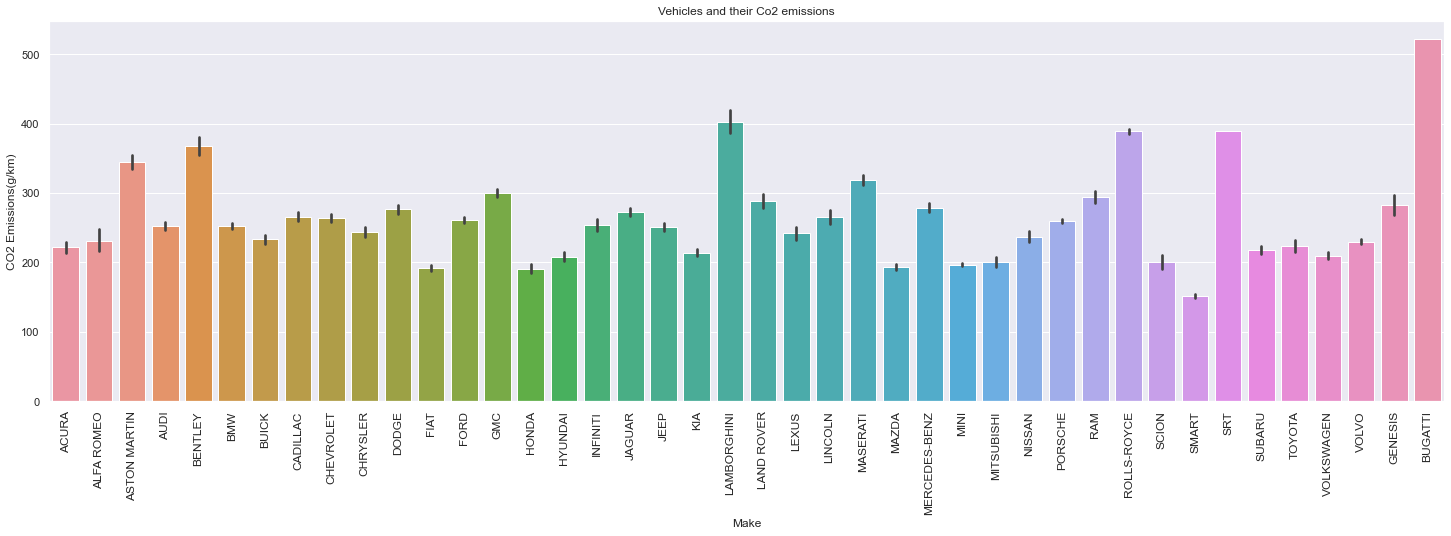

In [42]:
f, ax = plt.subplots(figsize=(25,7))
sns.set_theme(style="darkgrid")

x = data.Make.value_counts().sort_values()

ax = sns.barplot(data=data,x='Make',y='CO2 Emissions(g/km)')
plt.title('Vehicles and their Co2 emissions')
plt.xticks(rotation=90,fontweight='light', fontsize='12')
plt.show()

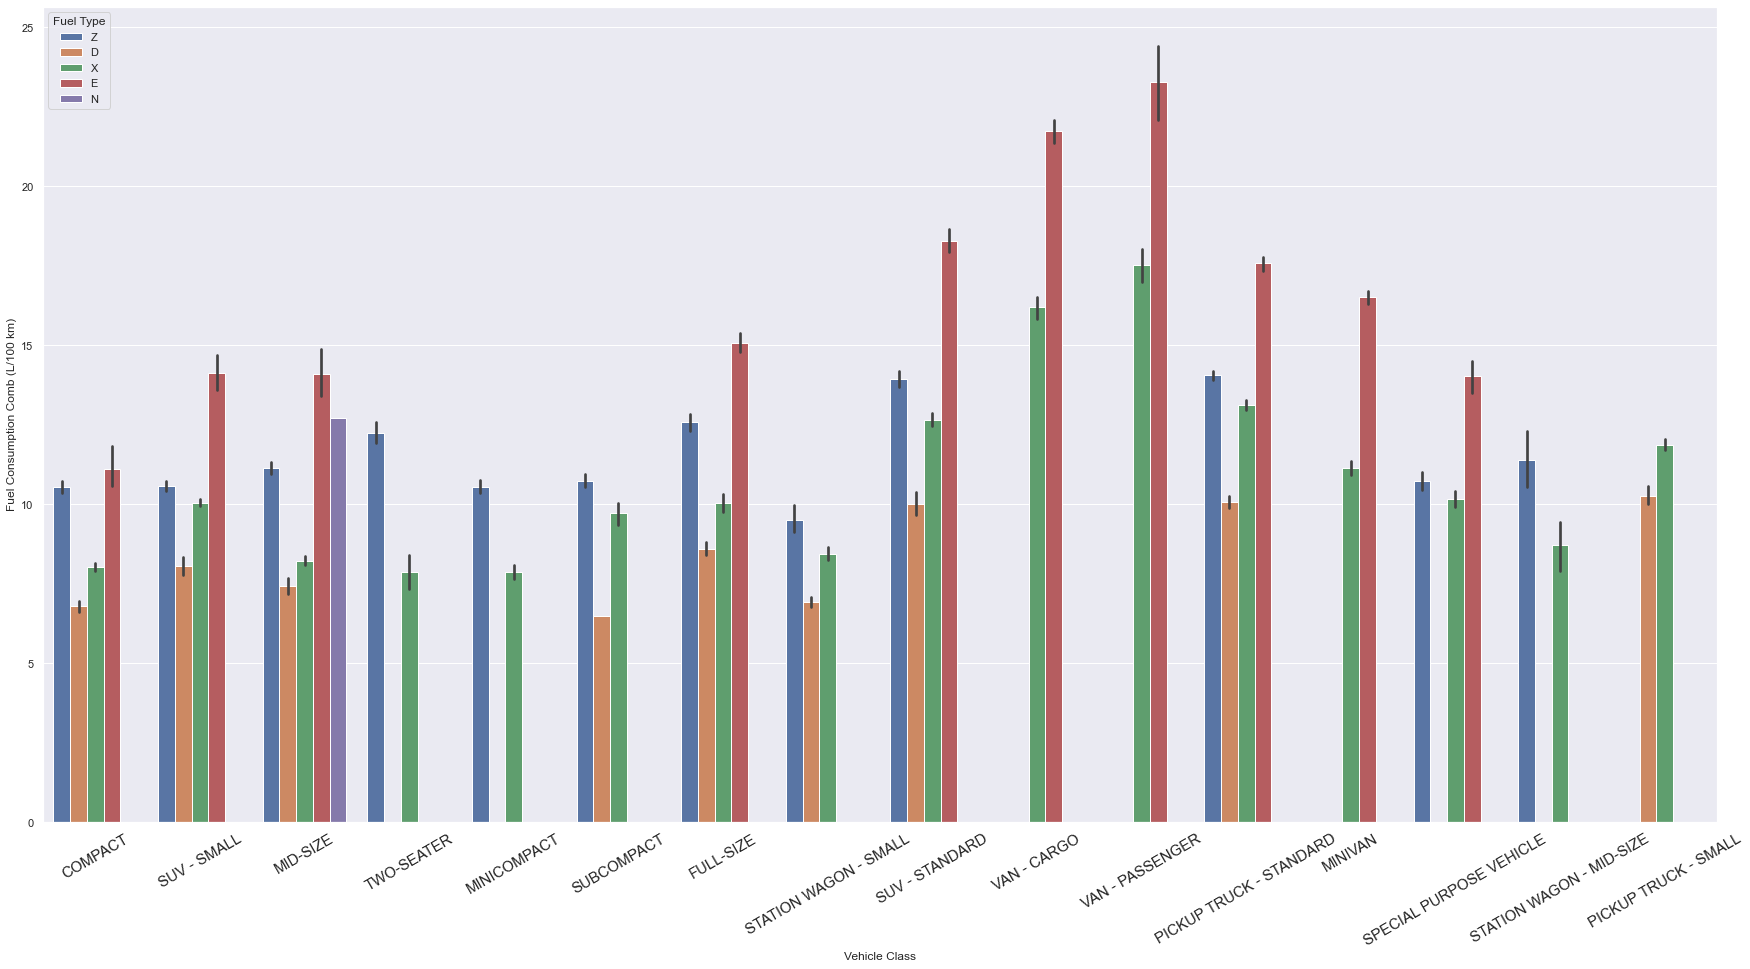

In [39]:
plt.figure(figsize=(30,15))
sns.barplot(x="Vehicle Class", y="Fuel Consumption Comb (L/100 km)", data=data,hue='Fuel Type')
plt.xticks(rotation=30, horizontalalignment="center",fontweight='light', fontsize='15')
plt.show()

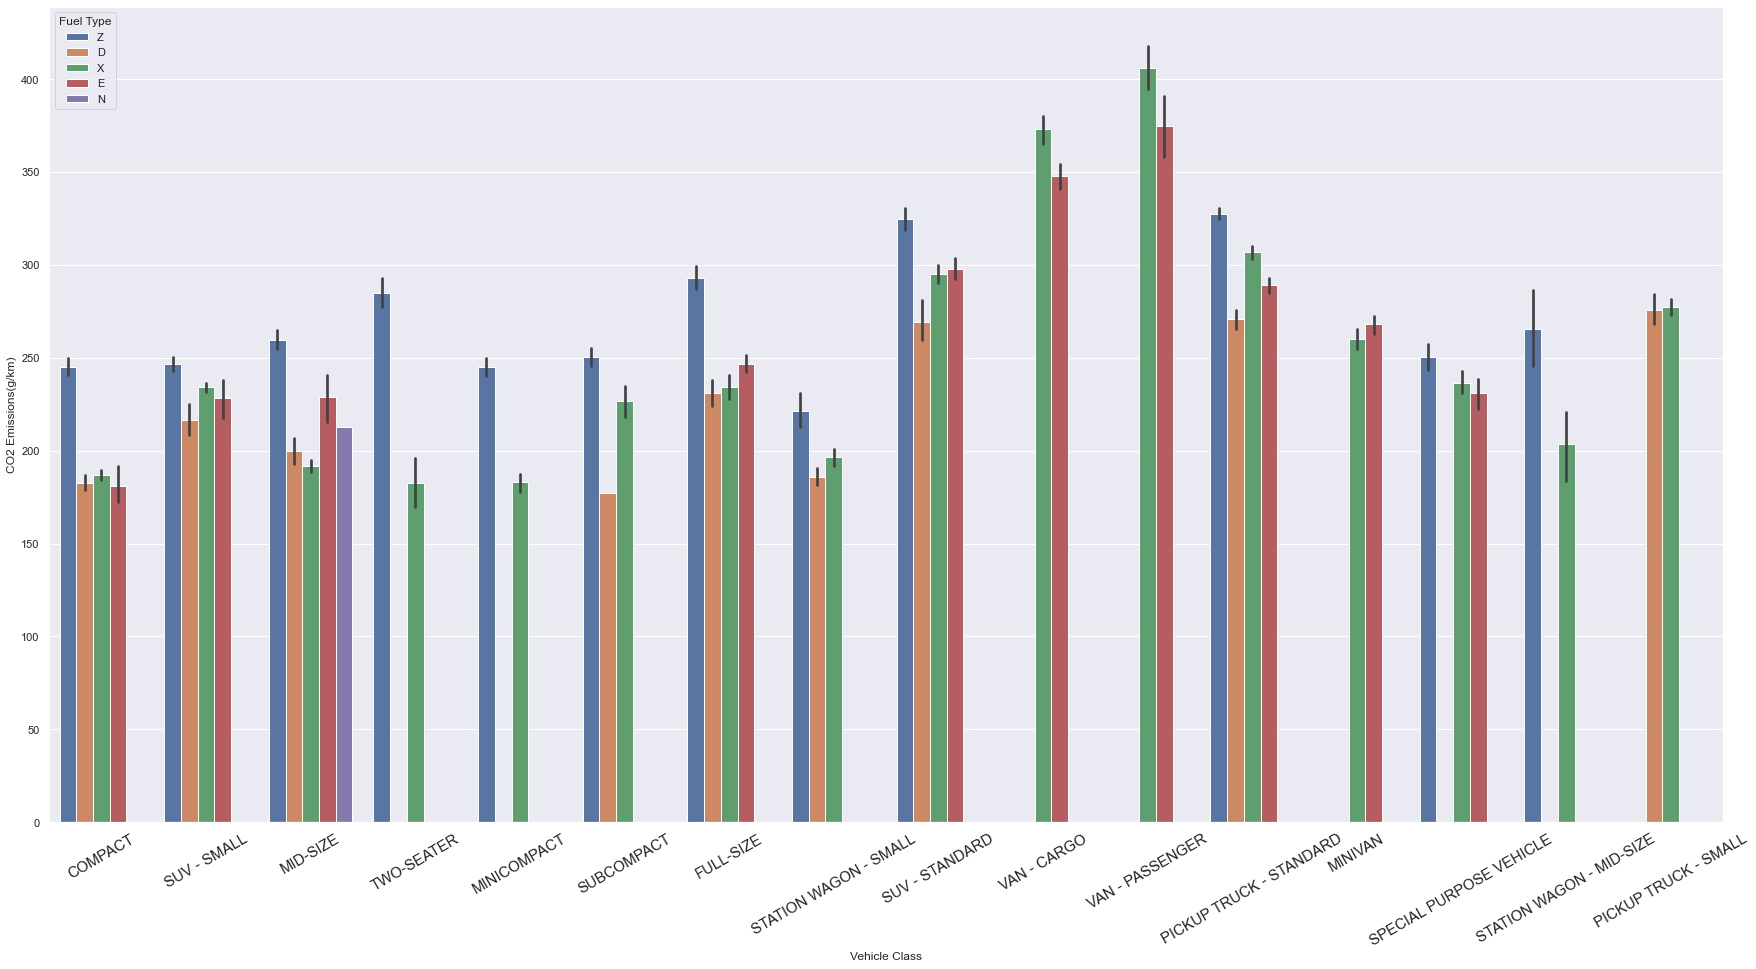

In [37]:
plt.figure(figsize=(30,15))
sns.barplot(x="Vehicle Class", y="CO2 Emissions(g/km)", data=data,hue='Fuel Type')
plt.xticks(rotation=30, horizontalalignment="center",fontweight='light', fontsize='15')
plt.show()

Text(0, 0.5, 'CO2 Emissions(g/km)')

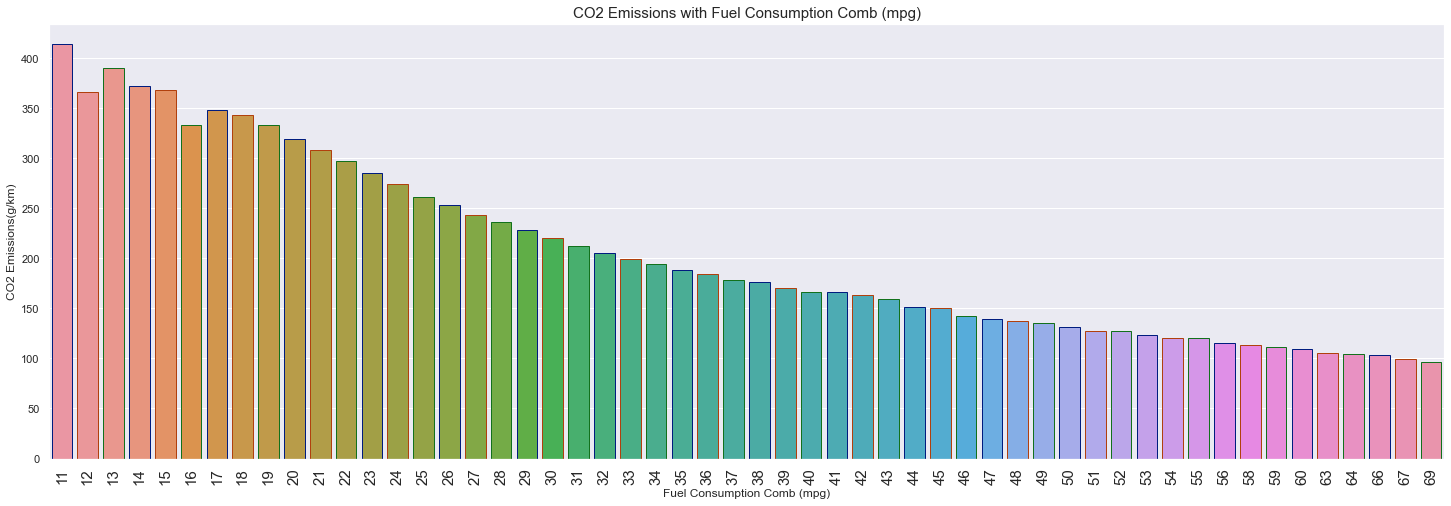

In [13]:
CO2_comb_mpg = data.groupby(['Fuel Consumption Comb (mpg)'])['CO2 Emissions(g/km)'].mean().reset_index()

plt.figure(figsize=(25,8))
sns.barplot(x = "Fuel Consumption Comb (mpg)", y="CO2 Emissions(g/km)",data = CO2_comb_mpg,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption Comb (mpg)', fontsize=15)
plt.xlabel('Fuel Consumption Comb (mpg)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontsize='15')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

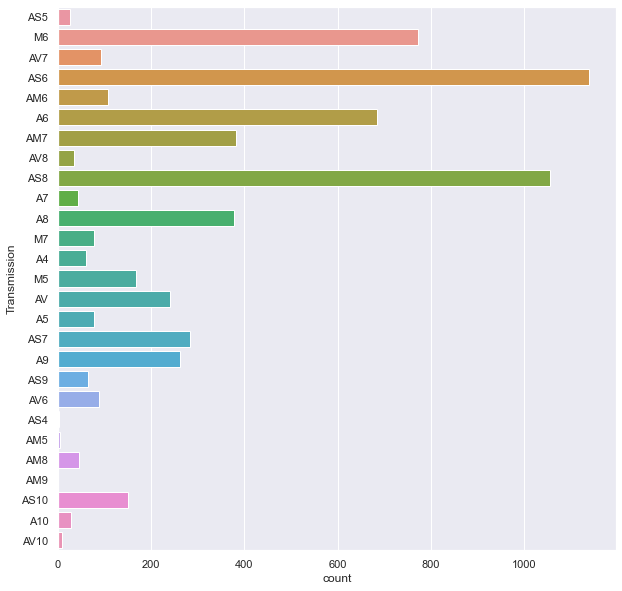

In [14]:
sns.set()
plt.figure(figsize = (10,10))
sns.countplot(y= data["Transmission"])
plt.show()

#### AS6 is the most occuring transmission type

In [15]:
data_Fuel_Type=data['Fuel Type'].value_counts().reset_index().rename(columns={'index':'Fuel_Type','Fuel Type':'Count'})

fig = go.Figure(go.Bar(
    x=data_Fuel_Type['Fuel_Type'],y=data_Fuel_Type['Count'],
    marker={'color': data_Fuel_Type['Count'], 
    'colorscale': 'Viridis'},  
    text=data_Fuel_Type['Count'],
    textposition = "outside",
))
fig.update_layout(title_text='Fuel Type Distribution ',xaxis_title="Fuel Type  ",yaxis_title="Number Of Vehicles ",title_x=0.5)
fig.show()

#### Fuel types Z and X are used dominantly both in highways and city which are "Premium gasoline" and "regular gasoline"

In [43]:
fig = px.scatter(data, x="Make", y="CO2 Emissions(g/km)")
fig.show()

In [45]:
fig = px.scatter(data, x="Make", y="Engine Size(L)")
fig.show()

In [46]:
fig = px.scatter(data, x="Make", y="Cylinders")
fig.show()

In [18]:
plt.figure(figsize=(20,10))
fig = px.scatter(data, x="Cylinders", y="CO2 Emissions(g/km)")
fig.show()

<Figure size 1440x720 with 0 Axes>

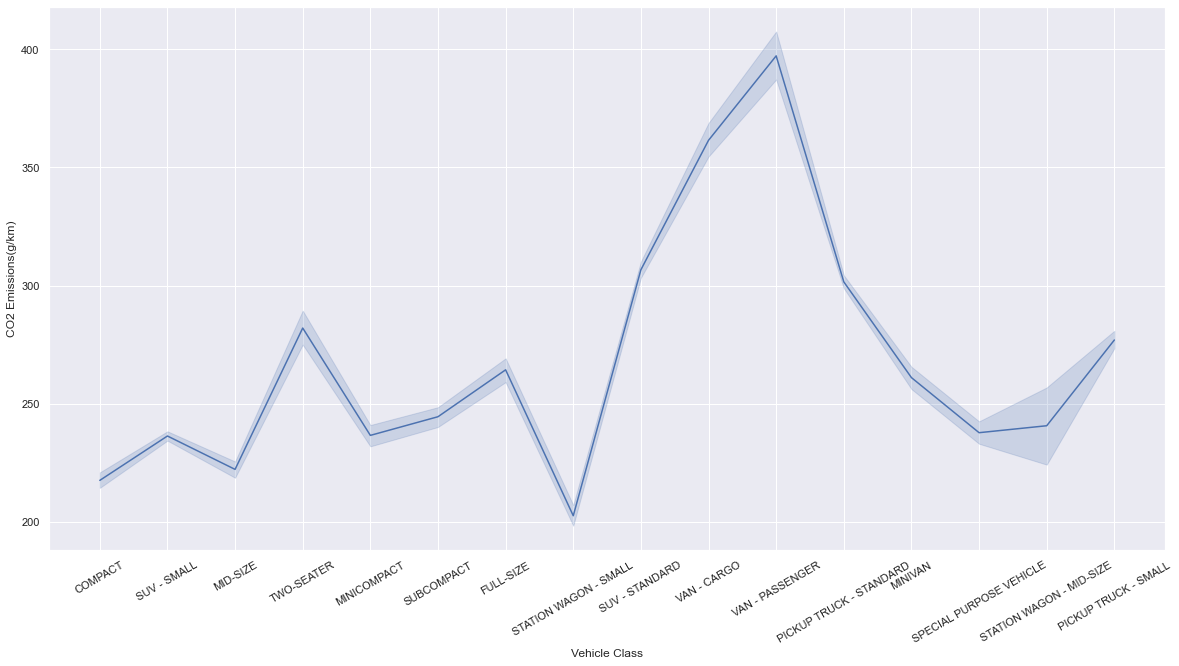

In [19]:
plt.figure(figsize=(20,10))
sns.lineplot(x = "Vehicle Class", y = "CO2 Emissions(g/km)",  data= data)
plt.xticks(rotation=30, horizontalalignment="center")
plt.show()

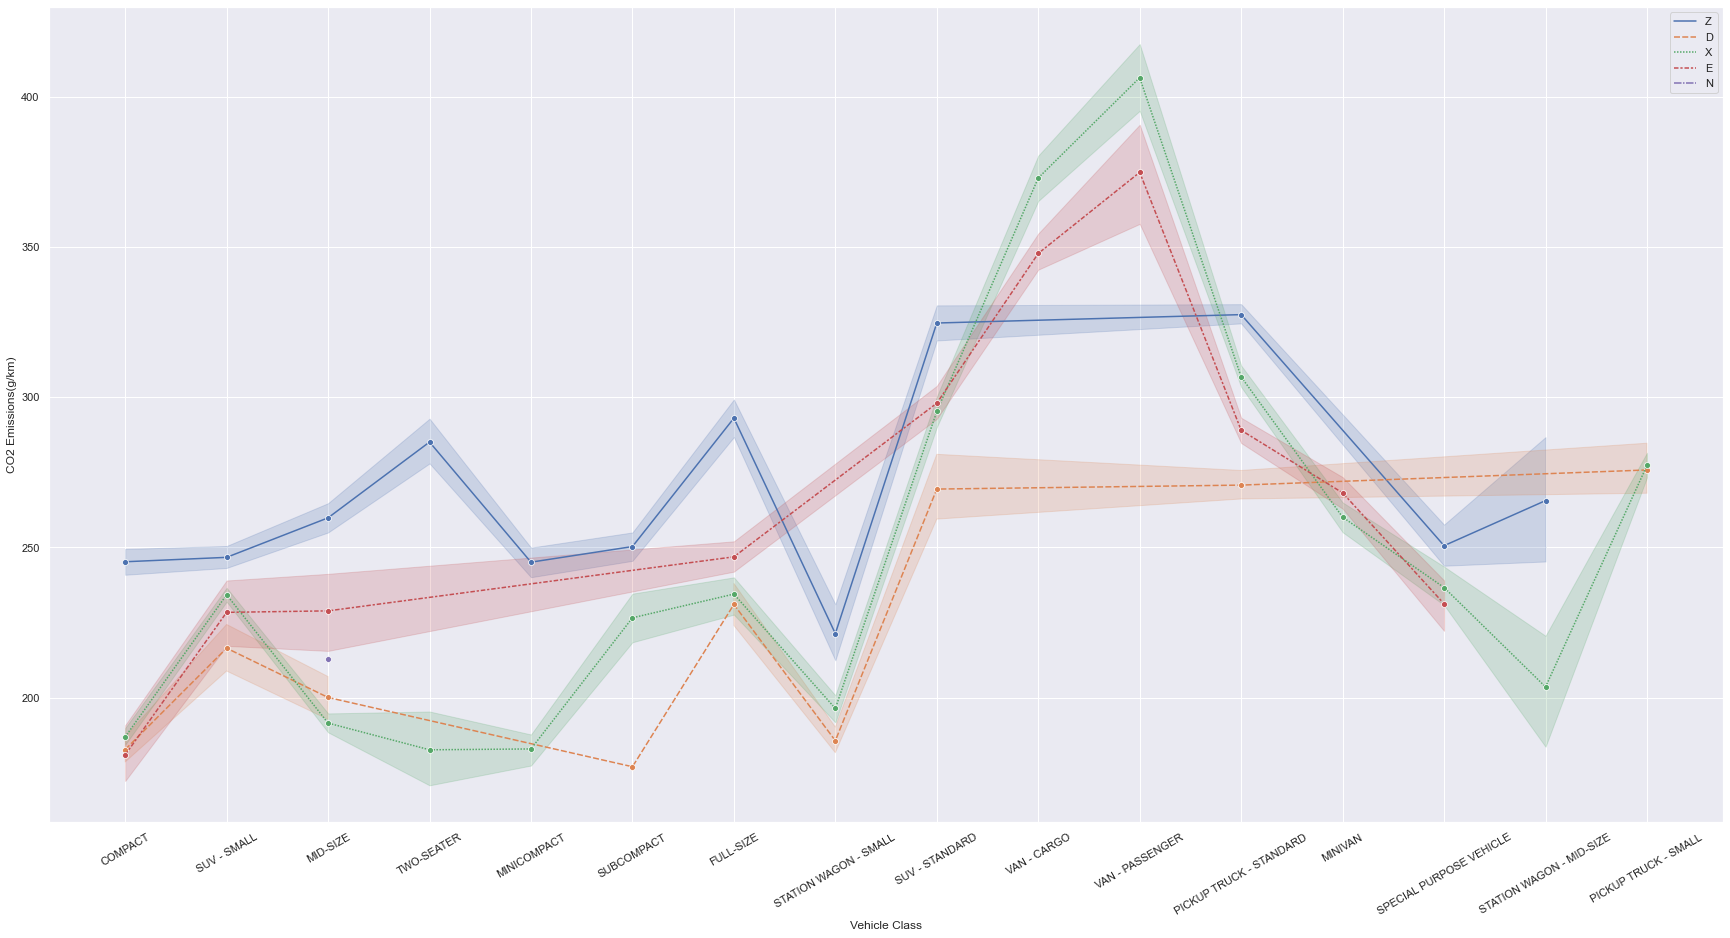

In [20]:
plt.figure(figsize=(30,15))
lg=sns.lineplot(x = "Vehicle Class", y = "CO2 Emissions(g/km)", hue='Fuel Type',marker='o',style='Fuel Type', data = data)
lg.legend(loc='upper right')
plt.xticks(rotation=30, horizontalalignment="center")
plt.show()

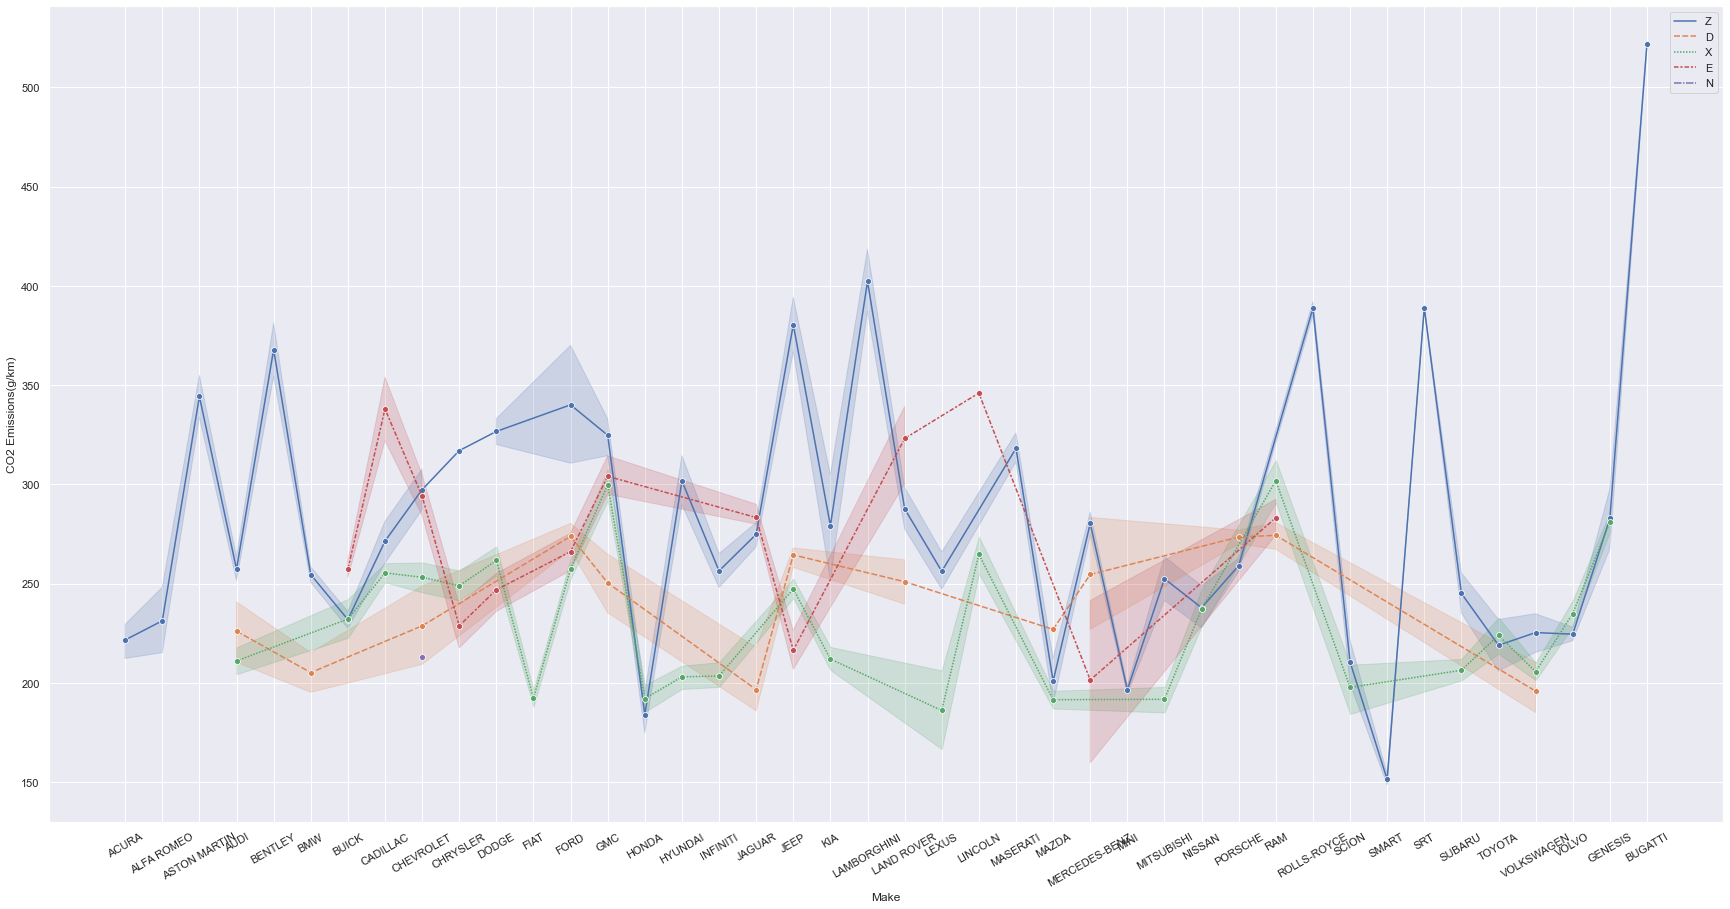

In [21]:
plt.figure(figsize=(30,15))
lg=sns.lineplot(x = "Make", y = "CO2 Emissions(g/km)", hue='Fuel Type',marker='o',style='Fuel Type', data = data)
lg.legend(loc='upper right')
plt.xticks(rotation=30, horizontalalignment="center")
plt.show()

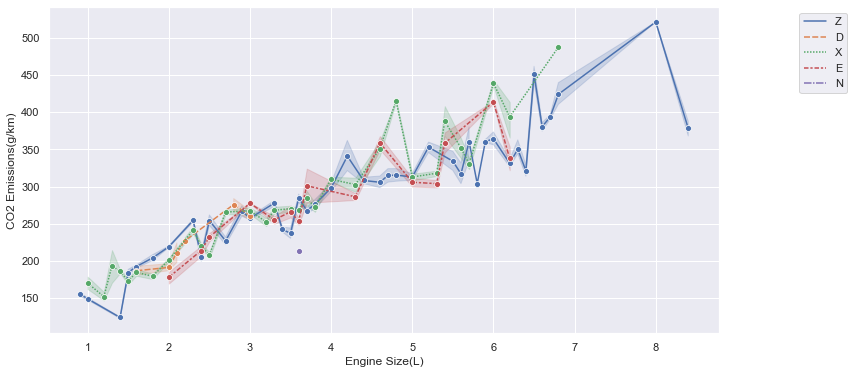

In [22]:
plt.figure(figsize=(12,6))
lg=sns.lineplot(x = "Engine Size(L)", y = "CO2 Emissions(g/km)", hue='Fuel Type',marker='o',style='Fuel Type', data = data)
lg.legend(loc='upper right', bbox_to_anchor=(1.2,1))
plt.show()

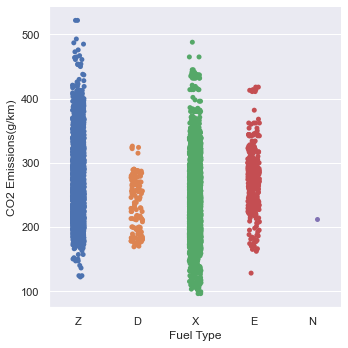

In [23]:
sns.catplot(x='Fuel Type', y='CO2 Emissions(g/km)',
 data = data)
plt.show()

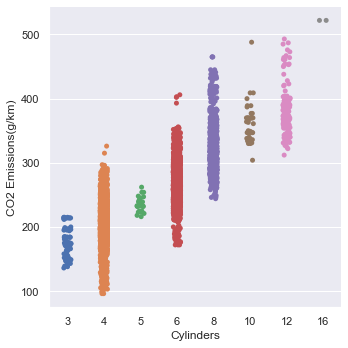

In [24]:
sns.catplot(x='Cylinders', y='CO2 Emissions(g/km)',
 data = data)
plt.show()

In [25]:
fig = go.Figure(data=[go.Histogram(x=data["Fuel Consumption City (L/100 km)"], histnorm='probability')])
fig.update_layout(title_text='Normalized Fuel Consumption City  ',xaxis_title="Fuel Consumption",yaxis_title="Ratio",title_x=0.5)
fig.show()

In [26]:
fig = go.Figure(data=[go.Histogram(x=data["Fuel Consumption Hwy (L/100 km)"], histnorm='probability')])
fig.update_layout(title_text='Normalized Fuel Consumption Highways  ',xaxis_title="Fuel Consumption",yaxis_title="Ratio",title_x=0.5)
fig.show()

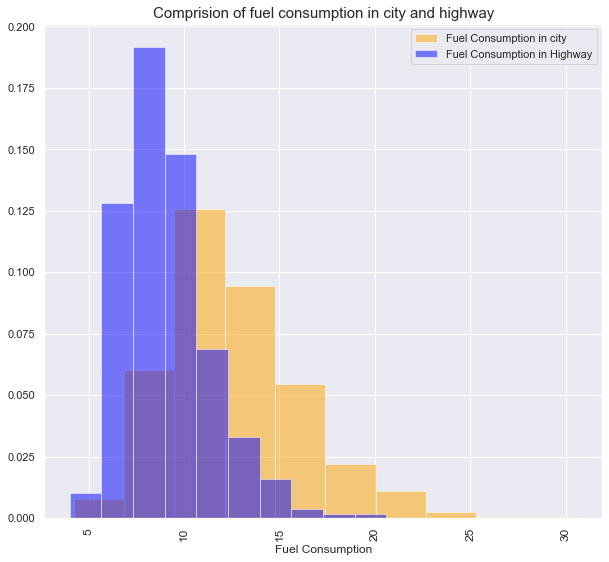

In [27]:
fig = plt.figure(figsize = (10,20))
ax = fig.add_subplot(2,1,1)
ax = plt.hist(data["Fuel Consumption City (L/100 km)"], color="orange", label="Fuel Consumption in city", density=True, alpha=0.5)
ax = plt.hist(data["Fuel Consumption Hwy (L/100 km)"], color="blue", label="Fuel Consumption in Highway", density=True, alpha=0.5)
plt.title('Comprision of fuel consumption in city and highway', fontsize=15)
plt.xlabel('Fuel Consumption', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='12')
ax = plt.legend()
plt.show()

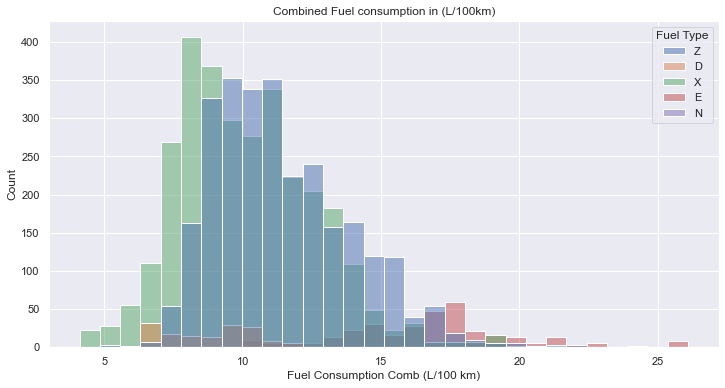

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(data=data, x="Fuel Consumption Comb (L/100 km)", bins=30,hue='Fuel Type')
plt.title('Combined Fuel consumption in (L/100km)')
plt.show()

Average CO2 Emission Per fuel type


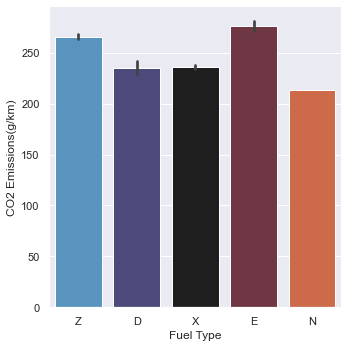

In [29]:
sns.set()
print("Average CO2 Emission Per fuel type")
g = sns.catplot(x ="Fuel Type", y ="CO2 Emissions(g/km)", data = data, kind = "bar", palette="icefire")
plt.show()

#### The Fuel type E emittes the most CO2

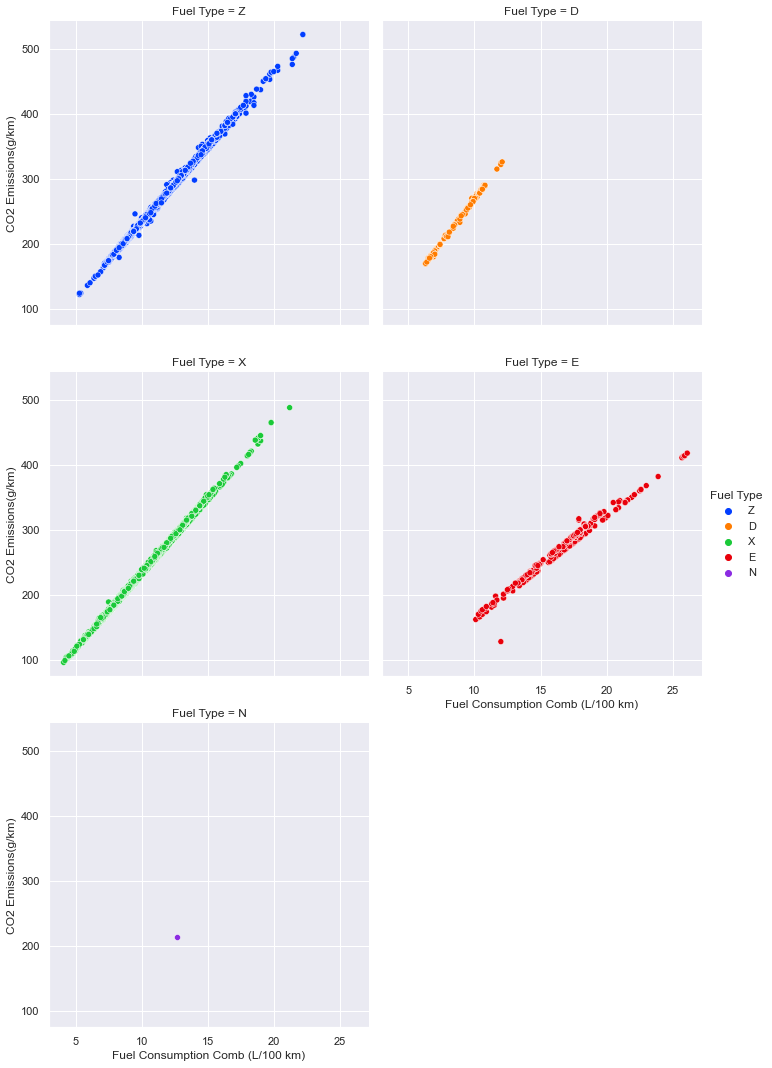

In [30]:
sns.set()
sns.relplot(x="Fuel Consumption Comb (L/100 km)", y="CO2 Emissions(g/km)", data = data, palette="bright", hue = "Fuel Type", col = "Fuel Type", col_wrap=2)
plt.show()

#### This plot is help to interprete the each fuel type and the emission of the fuel

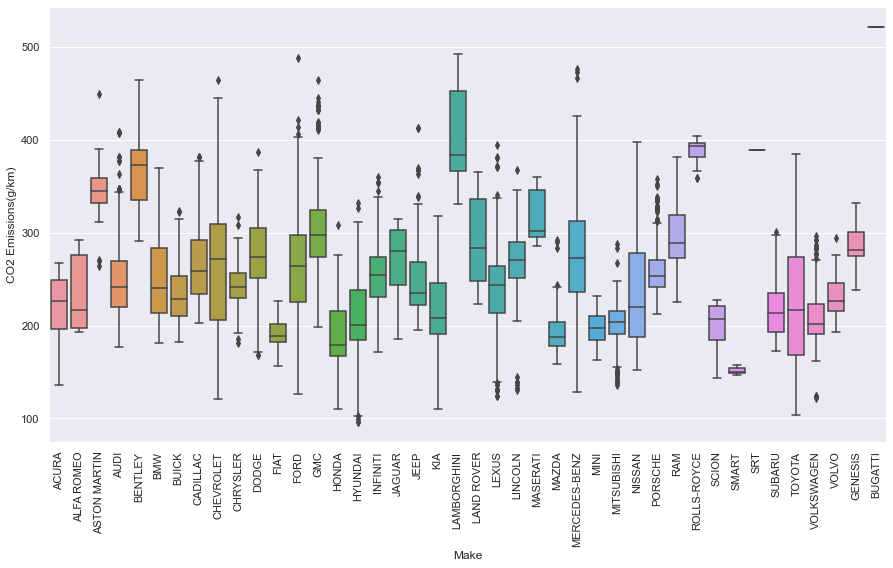

In [32]:
plt.figure(figsize = (15,8))
sns.boxplot(x="Make", y="CO2 Emissions(g/km)", data=data)
plt.xticks(rotation = 90)
plt.show()

In [33]:
fig = px.pie(data.sort_values(by='CO2 Emissions(g/km)',ascending=False).head(100), values='CO2 Emissions(g/km)', names='Make' )
fig.update_layout(title="CO2 Emission")
fig.show()

In [34]:
cel =data['Cylinders'].value_counts().reset_index()
fig = px.pie(cel, values='Cylinders', names='index')
fig.update_layout(title="Cylinders")
fig.show()

In [35]:
fig = px.pie(data.sort_values(by='Fuel Consumption Comb (L/100 km)',ascending=False).head(100), values='Fuel Consumption Comb (L/100 km)', names='Make' )
fig.update_layout(title="Fuel Consumption Comb (L/100 km)")
fig.show()